<a href="https://colab.research.google.com/github/dmsukhanov/pytorch-pytorch_lightning/blob/master/ImageNET_v3_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#code part 1
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import PIL.ImageOps
import urllib
import os

import torchvision
from torchvision import transforms
from torchvision import datasets
from torch.utils import data
from torch.utils.data import Dataset,DataLoader
from torch import nn

import torch.optim as optim

import matplotlib.pyplot as plt
import torch.nn.functional as F

import torch

page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04194289")
print(page.content)

# BeautifulSoup is an HTML parsing library

soup = BeautifulSoup(page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line
#print(soup)
#print(soup.prettify())

b"http://static.flickr.com/85/233578996_8f74463083.jpg\r\nhttp://farm3.static.flickr.com/2317/2472759369_f4cc1ff8a0.jpg\r\nhttp://static.flickr.com/2173/2071797511_200e3e4d2e.jpg\r\nhttp://farm2.static.flickr.com/1019/534041866_3aa182311c.jpg\r\nhttp://static.flickr.com/88/231940102_7beb5ecf3e.jpg\r\nhttp://farm4.static.flickr.com/3138/2724596903_d74dd64821.jpg\r\nhttp://static.flickr.com/174/453920264_9406e9972c.jpg\r\nhttp://farm2.static.flickr.com/1419/1408865234_caf87d02e3.jpg\r\nhttp://farm1.static.flickr.com/147/423542865_c091691a6b.jpg\r\nhttp://farm3.static.flickr.com/2074/2367492616_272bf6af6a.jpg\r\nhttp://farm2.static.flickr.com/1081/1365111200_8d105d9fb1.jpg\r\nhttp://farm3.static.flickr.com/2269/2348294071_94fc609f4a.jpg\r\nhttp://static.flickr.com/1016/1443997081_b5eb875055.jpg\r\nhttp://www.walleniuslines.com/img_upload/maersk_teal.jpg\r\nhttp://www.fondear.org/infonautic/Barco/Barco_Navegando/Contenedores_Peligro/sea_container_ship2.jpg\r\nhttp://static.flickr.com/198/4

In [ ]:
#code part 1.1
bikes_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02834778")
print(bikes_page.content)

# BeautifulSoup is an HTML parsing library
from bs4 import BeautifulSoup
bikes_soup = BeautifulSoup(bikes_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

b"http://farm2.static.flickr.com/1089/537335018_9813e94757.jpg\r\nhttp://members.lycos.nl/zwawe/hpbimg/fiets3.jpg\r\nhttp://communities.canada.com/shareit/photos/bicycles/images/64838/425x286.aspx\r\nhttp://farm2.static.flickr.com/1090/1441125154_341230126c.jpg\r\nhttp://farm4.static.flickr.com/3219/2681908945_dbe4c38deb.jpg\r\nhttp://farm3.static.flickr.com/2186/2358375851_fa98bf5314.jpg\r\nhttp://farm3.static.flickr.com/2375/2463989860_28a9d6743c.jpg\r\nhttp://bluh.nl/images/portfolio/grafisch/fiets.jpg\r\nhttp://www.bakkeveen.nl/Ondernemers/Bolhuis/2003_3_22_A.jpg\r\nhttp://upload.wikimedia.org/wikipedia/commons/a/a1/A_Bicycle_in_Oxford.JPG\r\nhttp://farm1.static.flickr.com/220/503379999_8301b3ed00.jpg\r\nhttp://farm3.static.flickr.com/2266/2539943000_005b996b1e.jpg\r\nhttp://home.kooee.com.au/nobananas/images/clayton-bike-1.jpg\r\nhttp://farm1.static.flickr.com/21/26188741_0a4a18d992.jpg\r\nhttp://farm3.static.flickr.com/2085/1642604624_4ca84a32c4.jpg\r\nhttp://www.bikeracks.us/ima

In [ ]:
#code part 2
str_soup=str(soup)#convert soup to string so it can be split
type(str_soup)
split_urls=str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(split_urls))#print the length of the list so you know how many urls you have

1262


In [ ]:
#code part 2.2
bikes_str_soup=str(bikes_soup)#convert soup to string so it can be split
type(bikes_str_soup)
bikes_split_urls=bikes_str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(bikes_split_urls))

1345


In [ ]:
#code part 3

!mkdir /content/train #create the Train folder
!mkdir /content/train/ships #create the ships folder
!mkdir /content/train/bikes #create the bikes folder
!mkdir /content/validation
!mkdir /content/validation/ships #create the ships folder
!mkdir /content/validation/bikes #create the bikes folder

mkdir: cannot create directory ‘/content/train’: File exists
mkdir: cannot create directory ‘/content/train/ships’: File exists
mkdir: cannot create directory ‘/content/train/bikes’: File exists
mkdir: cannot create directory ‘/content/validation’: File exists
mkdir: cannot create directory ‘/content/validation/ships’: File exists
mkdir: cannot create directory ‘/content/validation/bikes’: File exists


In [ ]:
def download_photo(img_url, filename):
  #try:
  image_on_web = urllib.request.urlopen(img_url)
  downloaded_image = open(filename, "wb")
  #buf = image_on_web.read()
  with downloaded_image as image:
      try:
          buf = image_on_web.read(65536)
          # if len(buf) == 0:
          #     break
          downloaded_image.write(buf)
          downloaded_image.close()
          image_on_web.close()
      except:
          return False
  return True

In [ ]:
split_urls[:46]

['http://static.flickr.com/85/233578996_8f74463083.jpg',
 'http://farm3.static.flickr.com/2317/2472759369_f4cc1ff8a0.jpg',
 'http://static.flickr.com/2173/2071797511_200e3e4d2e.jpg',
 'http://farm2.static.flickr.com/1019/534041866_3aa182311c.jpg',
 'http://static.flickr.com/88/231940102_7beb5ecf3e.jpg',
 'http://farm4.static.flickr.com/3138/2724596903_d74dd64821.jpg',
 'http://static.flickr.com/174/453920264_9406e9972c.jpg',
 'http://farm2.static.flickr.com/1419/1408865234_caf87d02e3.jpg',
 'http://farm1.static.flickr.com/147/423542865_c091691a6b.jpg',
 'http://farm3.static.flickr.com/2074/2367492616_272bf6af6a.jpg',
 'http://farm2.static.flickr.com/1081/1365111200_8d105d9fb1.jpg',
 'http://farm3.static.flickr.com/2269/2348294071_94fc609f4a.jpg',
 'http://static.flickr.com/1016/1443997081_b5eb875055.jpg',
 'http://www.walleniuslines.com/img_upload/maersk_teal.jpg',
 'http://www.fondear.org/infonautic/Barco/Barco_Navegando/Contenedores_Peligro/sea_container_ship2.jpg',
 'http://static.f

In [ ]:
n_of_training_images=100#the number of training images to use

for progress in range(n_of_training_images):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not split_urls[progress] == None: 
      try:
        save_path1 = '/content/train/bikes/img'+str(progress)+'.jpg'
        download_photo(bikes_split_urls[progress],save_path1)
      except:
        None

print("\nTRAIN:\n")          
print("\nlist the files inside bikes directory:\n")
!ls /content/train/bikes #list the files inside bikes        

0
20
40
60
80

TRAIN:


list the files inside bikes directory:

img0.jpg   img23.jpg  img36.jpg  img4.jpg   img62.jpg  img74.jpg  img8.jpg
img10.jpg  img24.jpg  img37.jpg  img51.jpg  img63.jpg  img75.jpg  img90.jpg
img11.jpg  img25.jpg  img39.jpg  img52.jpg  img64.jpg  img76.jpg  img91.jpg
img12.jpg  img26.jpg  img3.jpg	 img53.jpg  img65.jpg  img77.jpg  img92.jpg
img13.jpg  img27.jpg  img40.jpg  img54.jpg  img66.jpg  img78.jpg  img93.jpg
img14.jpg  img28.jpg  img41.jpg  img55.jpg  img67.jpg  img82.jpg  img94.jpg
img15.jpg  img29.jpg  img43.jpg  img56.jpg  img69.jpg  img83.jpg  img95.jpg
img16.jpg  img31.jpg  img45.jpg  img58.jpg  img6.jpg   img84.jpg  img96.jpg
img17.jpg  img32.jpg  img46.jpg  img59.jpg  img70.jpg  img85.jpg  img97.jpg
img18.jpg  img33.jpg  img47.jpg  img5.jpg   img71.jpg  img86.jpg  img98.jpg
img19.jpg  img34.jpg  img48.jpg  img60.jpg  img72.jpg  img87.jpg  img99.jpg
img21.jpg  img35.jpg  img49.jpg  img61.jpg  img73.jpg  img88.jpg  img9.jpg


In [ ]:
#code part 4

n_of_training_images=100#the number of training images to use

for progress in range(n_of_training_images):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not split_urls[progress] == None:
      try:
        #I = url_to_image(split_urls[progress])
        save_path = '/content/train/ships/img'+str(progress)+'.jpg'
        #img_name = 'img'+str(progress)+'.jpg'
        #urllib.request.urlretrieve(split_urls[progress],save_path)
        download_photo(split_urls[progress],save_path)

      except:
        None

#do the same for bikes:
for progress in range(n_of_training_images):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not bikes_split_urls[progress] == None:
      try:
        #I = url_to_image(bikes_split_urls[progress])
        save_path = '/content/train/bikes/img'+str(progress)+'.jpg'
        download_photo(bikes_split_urls[progress],save_path)
        #urllib.request.urlretrieve(bikes_split_urls[progress],save_path)
      except:
        None
        
        
#Validation data:

for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not split_urls[progress] == None:
      try:
        #I = url_to_image(split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        save_path = '/content/validation/ships/img'+str(progress)+'.jpg'
        download_photo(split_urls[n_of_training_images+progress],save_path)
        #urllib.request.urlretrieve(split_urls[n_of_training_images+progress],save_path)
      except:
        None

#do the same for bikes:
for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not bikes_split_urls[progress] == None:
      try:
        #I = url_to_image(bikes_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        save_path = '/content/validation/bikes/img'+str(progress)+'.jpg'
        download_photo(bikes_split_urls[n_of_training_images+progress],save_path)
        #urllib.request.urlretrieve(bikes_split_urls[n_of_training_images+progress],save_path)
      except:
        None
        
print("\nTRAIN:\n")          
print("\nlist the files inside ships directory:\n")        
!ls /content/train/ships #list the files inside ships
print("\nlist the files inside bikes directory:\n")
!ls /content/train/bikes #list the files inside bikes
print("\nVALIDATION:\n")
print("\nlist the files inside ships directory:\n")        
!ls /content/validation/ships #list the files inside ships
print("\nlist the files inside bikes directory:\n")
!ls /content/validation/bikes #list the files inside bikes   

0
20
40
60
80
0
20
40
60
80
0
20
40
0
20
40

TRAIN:


list the files inside ships directory:

img0.jpg   img23.jpg  img34.jpg  img49.jpg  img60.jpg  img72.jpg  img91.jpg
img11.jpg  img24.jpg  img35.jpg  img4.jpg   img62.jpg  img73.jpg  img92.jpg
img12.jpg  img25.jpg  img39.jpg  img51.jpg  img63.jpg  img74.jpg  img93.jpg
img13.jpg  img26.jpg  img3.jpg	 img52.jpg  img64.jpg  img76.jpg  img94.jpg
img14.jpg  img28.jpg  img40.jpg  img54.jpg  img66.jpg  img77.jpg  img95.jpg
img15.jpg  img29.jpg  img43.jpg  img55.jpg  img67.jpg  img78.jpg  img96.jpg
img16.jpg  img31.jpg  img46.jpg  img56.jpg  img69.jpg  img83.jpg  img97.jpg
img17.jpg  img32.jpg  img47.jpg  img59.jpg  img6.jpg   img86.jpg  img99.jpg
img18.jpg  img33.jpg  img48.jpg  img5.jpg   img70.jpg  img8.jpg

list the files inside bikes directory:

img0.jpg   img23.jpg  img36.jpg  img4.jpg   img62.jpg  img74.jpg  img8.jpg
img10.jpg  img24.jpg  img37.jpg  img51.jpg  img63.jpg  img75.jpg  img90.jpg
img11.jpg  img25.jpg  img39.jpg  img52.jpg 

In [ ]:
# import os

# list_remove = ['/content/train/bikes/img46.jpg','/content/train/bikes/img49.jpg','/content/train/ships/img13.jpg','/content/validation/bikes/img31.jpg']
# for i in list_remove:
#   try:
#    os.remove(i)
#   except:
#     pass

In [ ]:
train_dir = '/content/train/'
valid_dir = '/content/validation/'


In [ ]:
trans = transforms.Compose([transforms.ToTensor(),
                             transforms.Resize((224,224))
                              ])

trainset = datasets.ImageFolder(train_dir, transform=trans)
trainloader = data.DataLoader(trainset, batch_size=32, shuffle=False, 
                               num_workers=4, drop_last=True)

testset = datasets.ImageFolder(valid_dir, transform=trans)
testloader = data.DataLoader(testset, batch_size=32, shuffle=False, 
                               num_workers=4, drop_last=True)


In [ ]:
trainset[1][0][0].shape,len(trainset)

(torch.Size([224, 224]), 124)

In [ ]:
trainset.classes

#train_dataset.class_to_idx

['bikes', 'ships']

In [ ]:
testset.classes

['bikes', 'ships']

In [ ]:
classes = trainset.classes#('bikes', 'ships')

0


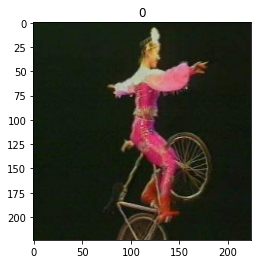

In [ ]:
img,lable = trainset[11]
plt.imshow(img.permute(1,2,0))
plt.title(lable)
print(lable)

In [ ]:
# import os
# list_remove = ['/content/train/bikes/img46.jpg','/content/train/bikes/img49.jpg','/content/train/ships/img13.jpg','/content/validation/bikes/img31.jpg']
# for i in list_remove:
#   try:
#    os.remove(i)
#   except:
#     pass

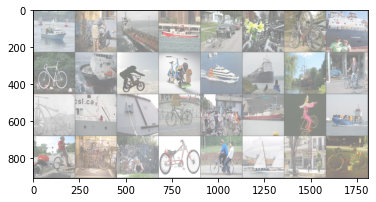

bikes bikes bikes bikes bikes bikes bikes bikes bikes bikes


In [ ]:
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(10)))

In [ ]:
#Define a Convolutional Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*53*53, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #print(x.shape)
        x = x.view(-1, 16*53*53)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = ['cuda' if torch.cuda.is_available() else 'cpu'][0]
net = Net().to(device)

In [ ]:
#Define a Loss function and optimizer
#import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
#Train the network
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

UnidentifiedImageError: ignored

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(10)))

NameError: ignored

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(10)))

Predicted:  bikes bikes bikes bikes bikes bikes bikes bikes bikes bikes


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %


In [ ]:
c 

tensor([ True,  True,  True,  True,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False])

In [ ]:
class_correct

[4.0, 0.0]

In [ ]:
labels

tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
labels.numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(len(labels.numpy())):
            label = labels[i]
            class_correct[label] += c[i].item()
            print(label)
            class_total[label] += 1
            print(class_total[label])
            print(class_correct[label])


for i in range(2):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

tensor(0)
1.0
1.0
tensor(0)
2.0
2.0
tensor(0)
3.0
3.0
tensor(0)
4.0
4.0
tensor(0)
5.0
5.0
tensor(0)
6.0
6.0
tensor(0)
7.0
7.0
tensor(0)
8.0
8.0
tensor(0)
9.0
9.0
tensor(0)
10.0
10.0
tensor(0)
11.0
11.0
tensor(0)
12.0
12.0
tensor(0)
13.0
13.0
tensor(0)
14.0
14.0
tensor(0)
15.0
15.0
tensor(0)
16.0
16.0
tensor(0)
17.0
17.0
tensor(0)
18.0
18.0
tensor(0)
19.0
19.0
tensor(0)
20.0
20.0
tensor(0)
21.0
21.0
tensor(0)
22.0
22.0
tensor(0)
23.0
23.0
tensor(0)
24.0
24.0
tensor(0)
25.0
25.0
tensor(0)
26.0
26.0
tensor(0)
27.0
27.0
tensor(0)
28.0
28.0
tensor(0)
29.0
29.0
tensor(0)
30.0
30.0
tensor(0)
31.0
31.0
tensor(0)
32.0
32.0
tensor(0)
33.0
33.0
tensor(0)
34.0
34.0
tensor(0)
35.0
35.0
tensor(0)
36.0
36.0
tensor(0)
37.0
37.0
tensor(1)
1.0
0.0
tensor(1)
2.0
0.0
tensor(1)
3.0
0.0
tensor(1)
4.0
0.0
tensor(1)
5.0
0.0
tensor(1)
6.0
0.0
tensor(1)
7.0
0.0
tensor(1)
8.0
0.0
tensor(1)
9.0
0.0
tensor(1)
10.0
0.0
tensor(1)
11.0
0.0
tensor(1)
12.0
0.0
tensor(1)
13.0
0.0
tensor(1)
14.0
0.0
tensor(1)
15.0
0.0
te